In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pingouin

%matplotlib inline

In [2]:
DATA = os.path.join('./Multiteaming data.csv')

In [113]:
df = pd.read_csv(DATA, sep=';')
df = df[~df['PRONUMBER'].isna()]
df['OVERALL'] = df['OVERALL'].str.replace(',', '.').astype(float)
df['NEEDCOG'] = df['NEEDCOG'].str.replace(',', '.').astype(float)
df['FAITHINTU'] = df['FAITHINTU'].str.replace(',', '.').astype(float)

In [114]:
df.shape

(273, 98)

In [115]:
grouped = df.groupby('PRONUMBER')

In [116]:
teamwise = grouped.mean()

### Raw Data

In [117]:
df.describe()

,PRONUMBER,NUMBERPROJECTSINVOLVED,AGE,TENURE,CSINDEX,YEAREMPLOYED,CSI1,CSI2,CSI3,CSI4,...,MARKET,TECH,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8
count,273.000000,273.000000,273.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,...,242.000000,242.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,57.194139,4.146520,41.135531,14.074074,41.967078,1997.925926,1.061728,0.897119,1.057613,0.893004,...,1.673554,1.826446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,32.792054,3.283279,9.360427,10.979068,11.545765,10.979068,0.957946,0.914592,0.920818,0.860564,...,0.743466,0.730801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,24.000000,1.000000,17.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32.000000,2.000000,34.000000,5.000000,35.000000,1990.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,51.000000,4.000000,40.000000,11.000000,42.000000,2001.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,83.000000,6.000000,48.000000,22.000000,51.000000,2007.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,120.000000,26.000000,62.000000,42.000000,71.000000,2011.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


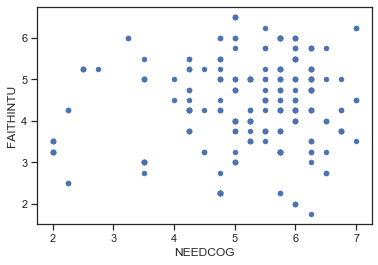

In [118]:
df.plot.scatter('NEEDCOG', 'FAITHINTU')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(3, 6.5)

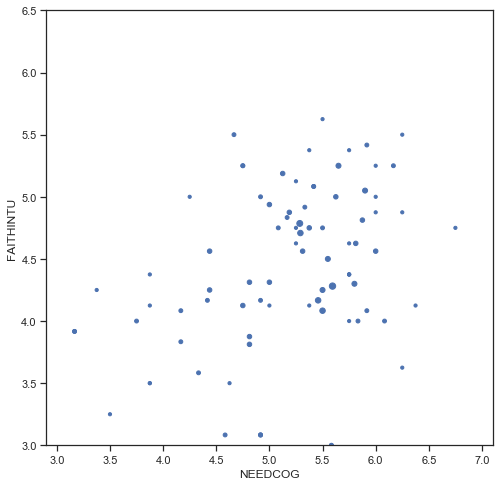

In [119]:
fig, ax = plt.subplots(figsize=(8, 8))
teamwise.plot.scatter('NEEDCOG', 'FAITHINTU', ax=ax, s=grouped.count()['COMPANY'].values*5)
plt.xlim((2.9, 7.1))
plt.ylim((3, 6.5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


,NUMBERPROJECTSINVOLVED,OVERALL
NUMBERPROJECTSINVOLVED,1.000000,0.123761
OVERALL,0.123761,1.000000


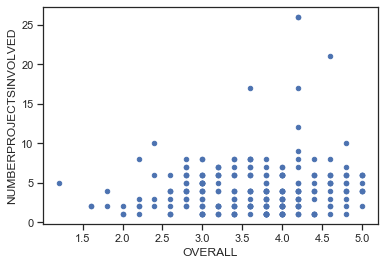

In [120]:
df.plot.scatter('OVERALL', 'NUMBERPROJECTSINVOLVED')
df[['NUMBERPROJECTSINVOLVED', 'OVERALL']].corr()

# plt.figure(figsize=(10, 6))
# plt.scatter(df['NUMBERPROJECTSINVOLVED'], df['OVERALL'])

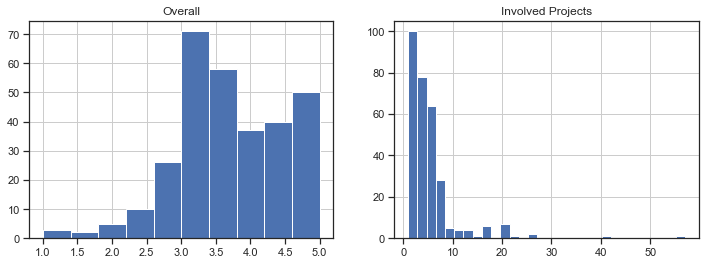

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
df['OVERALL'].hist(ax=ax1, bins=10)
ax1.set_title('Overall')
df['NUMBERPROJECTSINVOLVED'].hist(ax=ax2, bins=30)
ax2.set_title('Involved Projects');

### Grouped Data

In [73]:
teamwise[['NUMBERPROJECTSINVOLVED', 'OVERALL']].corr()

,NUMBERPROJECTSINVOLVED,OVERALL
NUMBERPROJECTSINVOLVED,1.000000,0.105527
OVERALL,0.105527,1.000000


In [78]:
mean_perf = df.groupby('PRONUMBER').mean()['OVERALL']

In [96]:
list(teamwise2.iterrows())[0][1]['PRONUMBER']

1.0

In [123]:
teamwise2 = df[['PRONUMBER', 'NUMBERPROJECTSINVOLVED']]
teamwise2['MEAN_PERF'] = [mean_perf[x['PRONUMBER']] for _, x in teamwise2.iterrows()]

c:\users\thomas\hpi\ma\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [134]:
import scipy
import sklearn

In [138]:
?scipy.stats.pearsonr

In [137]:
scipy.stats.pearsonr(teamwise2['MEAN_PERF'], teamwise2['NUMBERPROJECTSINVOLVED'])

(0.07971520515713056, 0.18912954048728225)

In [128]:
teamwise2[['MEAN_PERF', 'NUMBERPROJECTSINVOLVED']].corr()

,MEAN_PERF,NUMBERPROJECTSINVOLVED
MEAN_PERF,1.000000,0.079715
NUMBERPROJECTSINVOLVED,0.079715,1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


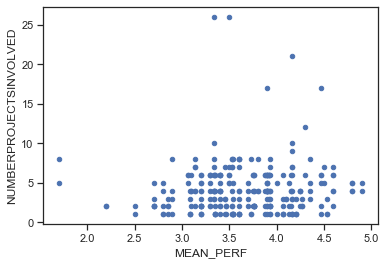

In [127]:
teamwise2.plot.scatter('MEAN_PERF', 'NUMBERPROJECTSINVOLVED')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


,NUMBERPROJECTSINVOLVED,OVERALL
NUMBERPROJECTSINVOLVED,1.000000,0.119608
OVERALL,0.119608,1.000000


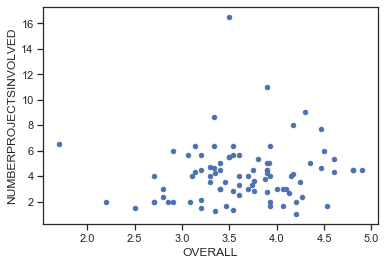

In [124]:
teamwise.plot.scatter('OVERALL', 'NUMBERPROJECTSINVOLVED')
teamwise[['NUMBERPROJECTSINVOLVED', 'OVERALL']].corr(method='spearman')

# plt.figure(figsize=(10, 6))
# plt.scatter(df['NUMBERPROJECTSINVOLVED'], df['OVERALL'])

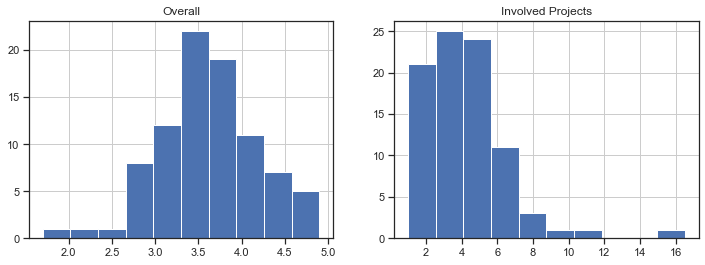

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
teamwise['OVERALL'].hist(ax=ax1, bins=10)
ax1.set_title('Overall')
teamwise['NUMBERPROJECTSINVOLVED'].hist(ax=ax2, bins=10)
ax2.set_title('Involved Projects');

In [275]:
df = pd.DataFrame([[1, 1, 1, 2, 2, 2], [4, 5, 6, 8, 9, 13]], index=['PRONUMBER', 'OVERALL']).T

# https://stats.stackexchange.com/a/350963/223143
# https://pingouin-stats.org/_modules/pingouin/reliability.html#intraclass_corr
# pingouin.intraclass_corr(df, 'PRONUMBER', 'PRONUMBER', 'OVERALL')
def ICC_1(d):
    k = len(d)
    n = d['PRONUMBER'].nunique()
    overall_mean = d.groupby('PRONUMBER')['OVERALL'].mean().mean()  # Unbalanced data so first take mean of groups
    n_teamsize = int(d.groupby('PRONUMBER')['OVERALL'].size().mean())

    s2_e = S2_within = d.groupby('PRONUMBER')['OVERALL'].var().mean()
    S2_between = sum((d.groupby('PRONUMBER')['OVERALL'].mean() - overall_mean)**2) / (n-1)
    s2_u = S2_between - S2_within / n_teamsize

    rho = s2_u / (s2_u + s2_e)
    # rho = (S2_between - S2_within) / (S2_between + (k-1)*S2_within)
    # rho = (S2_between - S2_within) / S2_between
    return rho

ICC_1(df), ICC_1(x)

(0.7362637362637362, 0.33514658087848614)